# **Installing FbProphet**


In [1]:
!pip install pystan==2.19.1.1 
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9537163 sha256=d9d7566aefd17295ab6ad0685e580196570613f33459901b56c1fe53218a76b8
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdsta

In [2]:
import pandas as pd
from fbprophet import Prophet

# **load Data set**

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv("/content/Historical Product Demand.csv")
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [5]:
frame = data[data['Product_Code']=='Product_0979'].copy()

In [6]:
frame.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500


In [7]:
frame.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

# **PreProcessing**
  1. Dropping useless columns

  2. Renaming columns

  3. Convert Ds : object type to datetime type

  4. Converting values in y which is not numeric
  5. Dropping NA records

In [8]:
frame.drop(["Product_Code" , "Product_Category" , "Warehouse"] , axis =1 , inplace = True)

In [9]:
frame

,Date,Order_Demand
1,2012/1/19,500
2,2012/2/3,500
3,2012/2/9,500
4,2012/3/2,500
5,2012/4/19,500
...,...,...
1046235,2016/10/5,100
1046242,2016/11/8,700
1046245,2016/11/14,300
1046253,2016/12/9,200


In [10]:
frame.columns = ['ds' , 'y']

In [11]:
frame.dtypes

ds    object
y     object
dtype: object

In [12]:
frame['ds']= pd.to_datetime(frame['ds'])

In [13]:
frame.dtypes

ds    datetime64[ns]
y             object
dtype: object

In [14]:
df = frame[pd.to_numeric(frame['y'], errors='coerce').notnull()]

In [15]:
df_processed = df.dropna(axis = 0, how ='any')

In [16]:
df_processed.head()

,ds,y
1,2012-01-19,500
2,2012-02-03,500
3,2012-02-09,500
4,2012-03-02,500
5,2012-04-19,500


In [17]:
df_processed.tail()

,ds,y
1046235,2016-10-05,100
1046242,2016-11-08,700
1046245,2016-11-14,300
1046253,2016-12-09,200
1046256,2016-12-13,100


# **Model Fitting**

In [18]:
model = Prophet(interval_width = 0.95)

In [19]:
training_run = model.fit(df_processed)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = model.make_future_dataframe(periods = 400 , freq ='D')

In [21]:
future.tail()

,ds
1612,2018-01-26
1613,2018-01-27
1614,2018-01-28
1615,2018-01-29
1616,2018-01-30


In [22]:
future.head()

,ds
0,2012-01-03
1,2012-01-05
2,2012-01-06
3,2012-01-09
4,2012-01-10


# **Forecasting and Evaluation**

In [23]:
forecast = model.predict(future)

In [24]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1612,2018-01-26,1770.880764,-7553.825285,9492.196190,1627.536567,1922.750679,-621.228999,-621.228999,-621.228999,-229.012025,-229.012025,-229.012025,-392.216974,-392.216974,-392.216974,0.0,0.0,0.0,1149.651765
1613,2018-01-27,1770.287911,-7607.637358,8988.380598,1626.561597,1923.150714,-949.163497,-949.163497,-949.163497,-541.311725,-541.311725,-541.311725,-407.851772,-407.851772,-407.851772,0.0,0.0,0.0,821.124413
1614,2018-01-28,1769.695057,-5685.605100,11721.772557,1625.586627,1923.550750,1034.602155,1034.602155,1034.602155,1448.693095,1448.693095,1448.693095,-414.090941,-414.090941,-414.090941,0.0,0.0,0.0,2804.297212
1615,2018-01-29,1769.102204,-6375.159948,10086.910031,1624.611657,1923.950785,-348.574317,-348.574317,-348.574317,61.963163,61.963163,61.963163,-410.537480,-410.537480,-410.537480,0.0,0.0,0.0,1420.527886
1616,2018-01-30,1768.509350,-7200.497074,8818.913304,1623.636687,1924.331014,-814.589915,-814.589915,-814.589915,-417.565672,-417.565672,-417.565672,-397.024243,-397.024243,-397.024243,0.0,0.0,0.0,953.919435


In [25]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,1270.948655,-7107.564266,9527.341256,1270.948655,1270.948655,-311.278858,-311.278858,-311.278858,-417.565672,-417.565672,-417.565672,106.286814,106.286814,106.286814,0.0,0.0,0.0,959.669797
1,2012-01-05,1273.371440,-6739.182626,9973.867413,1273.371440,1273.371440,200.595844,200.595844,200.595844,15.306917,15.306917,15.306917,185.288927,185.288927,185.288927,0.0,0.0,0.0,1473.967285
2,2012-01-06,1274.582833,-7360.162140,9428.114181,1274.582833,1274.582833,-13.292910,-13.292910,-13.292910,-229.012025,-229.012025,-229.012025,215.719115,215.719115,215.719115,0.0,0.0,0.0,1261.289923
3,2012-01-09,1278.217011,-6758.950153,9798.290964,1278.217011,1278.217011,323.891317,323.891317,323.891317,61.963163,61.963163,61.963163,261.928155,261.928155,261.928155,0.0,0.0,0.0,1602.108329
4,2012-01-10,1279.428404,-6620.270373,9138.780243,1279.428404,1279.428404,-156.699012,-156.699012,-156.699012,-417.565672,-417.565672,-417.565672,260.866660,260.866660,260.866660,0.0,0.0,0.0,1122.729392


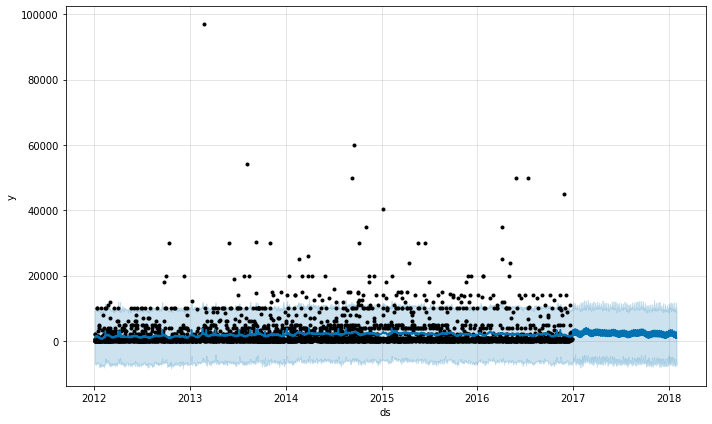

In [26]:
plot1 = model.plot(forecast)

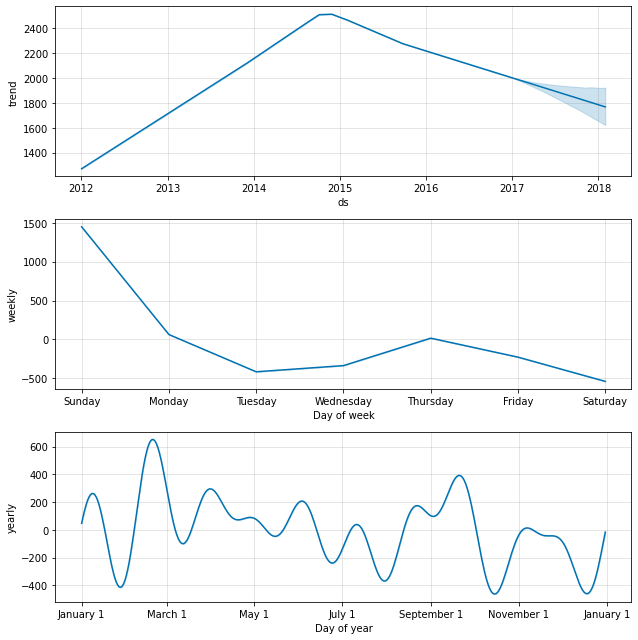

In [27]:
plot2 = model.plot_components(forecast)